# How to identify the defaulters beforehand?

## Investigation Overview

In this investigation, I wanted to look at the characteristics of defaulter that could be used to predict defaulters beforehand

## Dataset Overview

This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Dataset comes from "Prosper" peer-to-peer lending platform. For the sake of simplicity we are only considering loans which have Prosper Rating (After 2009).


In [59]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

df_total = pd.read_csv("prosperLoanData.csv")

#Columns to be discarded 
discarded_vars = ["MemberKey","LP_CustomerPayments","LP_CustomerPrincipalPayments","LP_InterestandFees",
                  "LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss","LP_NetPrincipalLoss",
                  "LP_NonPrincipalRecoverypayments","LoanOriginationQuarter","LoanOriginationDate",
                  "LoanNumber","LoanMonthsSinceOrigination","LoanFirstDefaultedCycleNumber",
                  "LoanCurrentDaysDelinquent","ScorexChangeAtTimeOfListing",
                 "LoanKey","ListingKey","ListingNumber","ListingCreationDate",
                 "CreditGrade","AmountDelinquent","BorrowerState","ClosedDate","CurrentDelinquencies",
                  "GroupKey","TotalTrades","TradesNeverDelinquent (percentage)","DateCreditPulled",
                 "DelinquenciesLast7Years","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn",
                 "FirstRecordedCreditLine","OnTimeProsperPayments","OpenCreditLines","TradesOpenedLast6Months",
                 "TotalInquiries","LoanFirstDefaultedCycleNumber","ProsperRating (Alpha)",
                  "IncomeVerifiable","OpenRevolvingAccounts",'OpenRevolvingMonthlyPayment']

df_total.drop(discarded_vars,axis =1,inplace=True)
# Removing PercentFunded not 1 

df_total = df_total[df_total.PercentFunded==1]# Removing the loans which are not completed or defaulted

df_total =  df_total[~(df_total.LoanStatus=="Current")]
df_total =  df_total[~(df_total.LoanStatus=="Cancelled")]
pattern = r'Past'
df_total = df_total[~df_total.LoanStatus.str.contains(pattern)]

df_total['LoanStatus'] = df_total['LoanStatus'].map({'Completed': 0, 'Defaulted': 1,'Chargedoff':1,'FinalPaymentInProgress':0})
df_total["ListingCategory"] = df_total["ListingCategory (numeric)"]
df_total.drop("ListingCategory (numeric)",axis=1,inplace=True)
df_total["ProsperRating"] = df_total["ProsperRating (numeric)"]
df_total.drop("ProsperRating (numeric)",axis=1,inplace=True)
df_total.AvailableBankcardCredit.fillna(0,inplace= True)
df_total.BankcardUtilization.fillna(0,inplace= True)
df_total.BorrowerAPR.fillna(0,inplace= True)
df_total.CurrentCreditLines.fillna(0,inplace= True)
df_total.EmploymentStatus.fillna('Not available',inplace= True)
df_total.EmploymentStatusDuration.fillna(0,inplace= True)
df_total.InquiriesLast6Months.fillna(0,inplace= True)
df_total.Occupation.fillna("Other",inplace= True)
df_total.ProsperPaymentsLessThanOneMonthLate.fillna(0,inplace= True)
df_total.ProsperPaymentsOneMonthPlusLate.fillna(0,inplace= True)
df_total.TotalProsperLoans.fillna(0,inplace= True)
df_total.RevolvingCreditBalance.fillna(0,inplace= True)
df_total.ProsperPrincipalBorrowed.fillna(0,inplace= True)
df_total.ProsperPrincipalOutstanding.fillna(0,inplace= True)
df_total.PublicRecordsLast12Months.fillna(0,inplace= True)
df_total.PublicRecordsLast10Years.fillna(0,inplace= True)
df_total.TotalProsperPaymentsBilled.fillna(0,inplace= True)

df_total.dropna(subset=['DebtToIncomeRatio', 'CreditScoreRangeLower','CreditScoreRangeUpper'],axis='rows',inplace=True)

df_new = df_total[~df_total.ProsperScore.isna()]
df_old = df_total[df_total.ProsperScore.isna()]

# Data Engg

df_new["Investors"] = pd.cut(np.array(df_new.Investors), [0,1,6,11,21,51,100000],labels=["1","2-5","5-10","10-20","20-50","50+"])
df_new["InquiriesLast6Months"] = pd.cut(np.array(df_new.InquiriesLast6Months), [-1,0,1,2,3,4,5,100],labels=["0","1","2","3","4","5","6+"])
df_new["InvestmentFromFriendsCount"] = pd.cut(np.array(df_new.InvestmentFromFriendsCount), [-1,2,4,1000],labels=["0","1-3","3+"])
df_new["Recommendations"] = pd.cut(np.array(df_new.Recommendations), [-1,0,100],labels=["0","1+"])
df_new["TotalProsperLoans"] = pd.cut(np.array(df_new.TotalProsperLoans), [-1,0,1,100],labels=["0","1","2+"])
df_new["CreditScore"] = (df_new["CreditScoreRangeLower"] + df_new["CreditScoreRangeUpper"] )/2


/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

## Distribution of Loans

In the below graph we are having the number of Completed Loans and the Defaulted Loans. We can clearly see that number of Defaulted Loan is lot lesser than the number of Completed Loans.

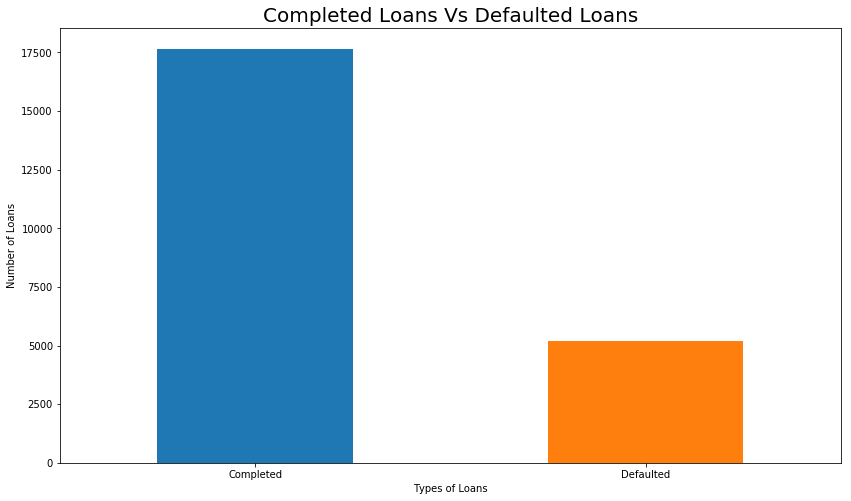

In [192]:
plt.figure(figsize=(14, 8))
df_new.LoanStatus.value_counts().plot(kind='bar',)
plt.title("Completed Loans Vs Defaulted Loans",fontsize=20)
plt.ylabel("Number of Loans")
plt.xlabel("Types of Loans")
plt.xticks([0,1],("Completed","Defaulted"), rotation=0);

## Distribution of Loans according to Duration

In the below plot we are having the number of Loans with its duration. 36 being the most common.

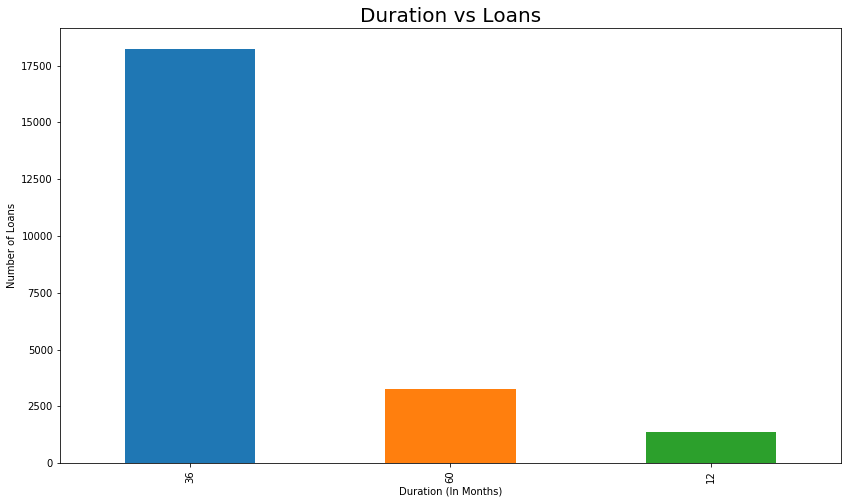

In [193]:
plt.figure(figsize=(14, 8))
df_new.Term.value_counts().plot(kind='bar',)
plt.title("Duration vs Loans",fontsize=20)
plt.ylabel("Number of Loans")
plt.xlabel("Duration (In Months)");

In [49]:
def value_counts_status(df,col):
    counts =  (df_new.groupby([col])['LoanStatus']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
    plt.figure(figsize=(12, 8))
    sns.barplot(x=col, y="percentage", hue="LoanStatus", data=counts)

### Duration and Loans Defaulted 
This plot shows that there is a direct correlation between the number of months and Defaulted Loans. It is more likely to get defaulted if the loan is of 60 months rather than loan of Duration 12 Months

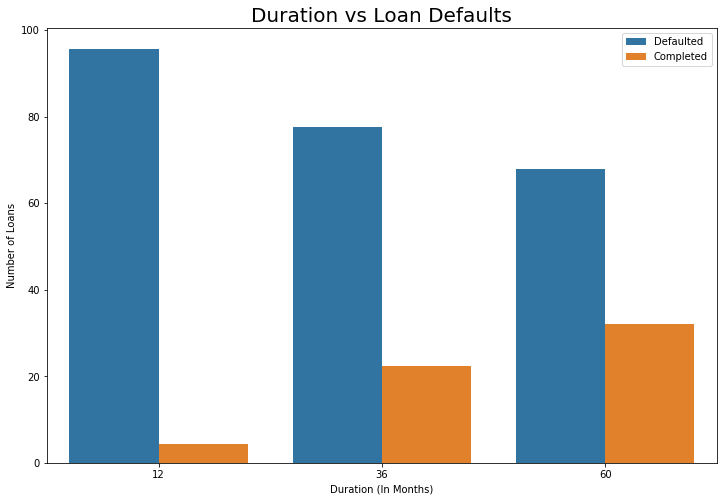

In [50]:
value_counts_status(df_new,'Term');
plt.title("Duration vs Loan Defaults",fontsize=20)
plt.ylabel("Number of Loans")
plt.xlabel("Duration (In Months)")
lg = plt.legend()
lg.get_texts()[0].set_text('Defaulted')
lg.get_texts()[1].set_text('Completed');

### Employment Status and Loans Defaulted 

This plots shows an interesting trend. Employment Status 'Other' are most likely to be Loan Defaulted and Not Employed People and Self-Employed people are least likely to be a loan defaulter.

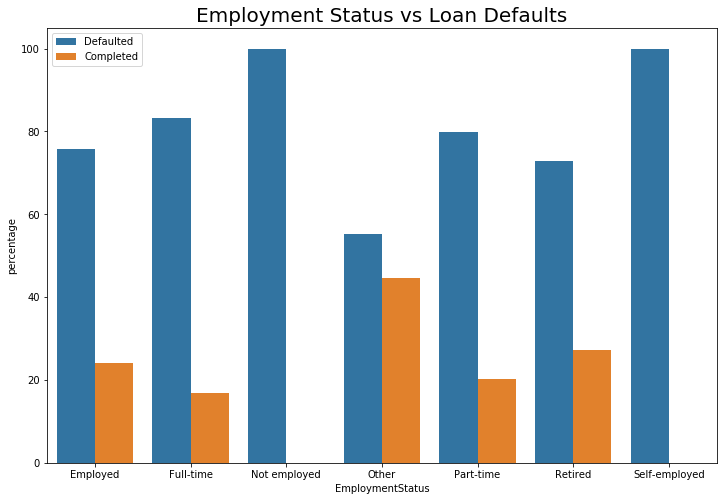

In [194]:
value_counts_status(df_new,'EmploymentStatus')
lg = plt.legend()
plt.title("Employment Status vs Loan Defaults",fontsize=20)
lg.get_texts()[0].set_text('Defaulted')
lg.get_texts()[1].set_text('Completed');

### Income Range  and Loans Defaulted 

This plots shows an expected trend. The loan defaulter tend to decrease as the income tends to increase. However, 
Not Employed People have not deafulted any Loans. Let's investigate that a bit more

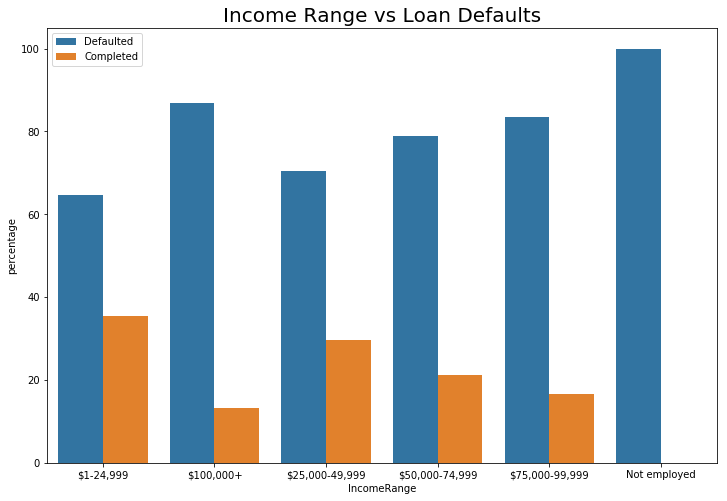

In [196]:
value_counts_status(df_new,'IncomeRange')
lg = plt.legend()
plt.title("Income Range vs Loan Defaults",fontsize=20)
lg.get_texts()[0].set_text('Defaulted')
lg.get_texts()[1].set_text('Completed');

### Investigating the reason for 100% Payment by Not Employed People 
After investigating it athat a bit more we can clearly see that number of loans given to Umemployed person is tending to Zero. Probably they tend to avoid giving loans to people without jobs for greater risks.

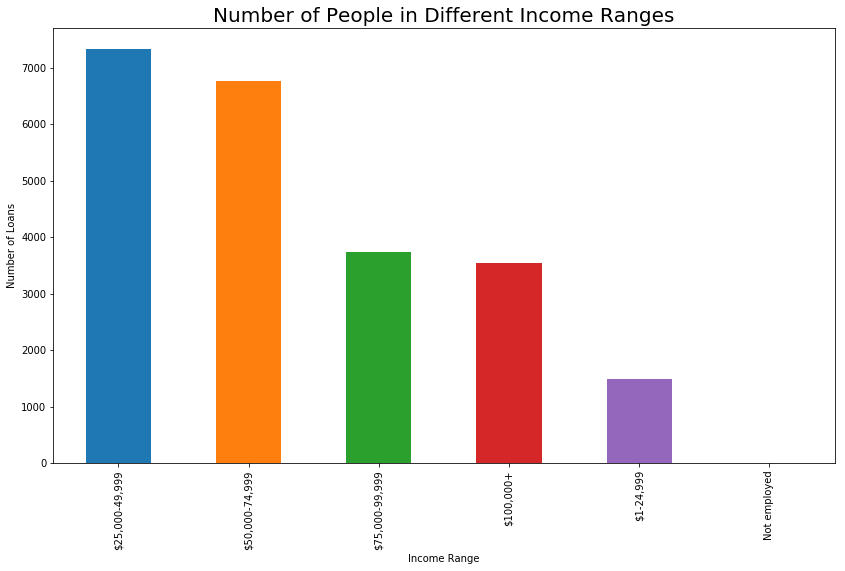

In [202]:
plt.figure(figsize=(14, 8))
df_new.IncomeRange.value_counts().plot(kind='bar',)
plt.title("Number of People in Different Income Ranges",fontsize=20)
plt.ylabel("Number of Loans")
plt.xlabel("Income Range");

### Number of Investors and Loans Defaulted 

This plots shows an offbeat trend. The trend is parabolic. There is maximum chances of getting a defaulted loan when there are around 5-10 Investor. There is Lesser Chances in both the direction from that.

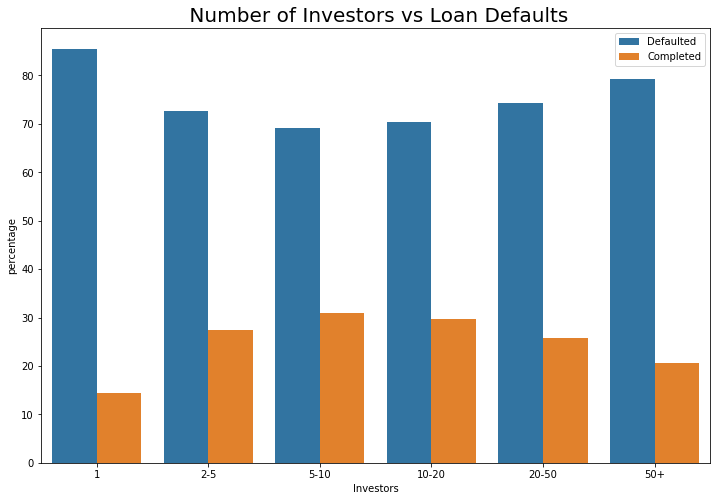

In [204]:
value_counts_status(df_new,'Investors')
lg = plt.legend()
plt.title(" Number of Investors vs Loan Defaults",fontsize=20)
lg.get_texts()[0].set_text('Defaulted')
lg.get_texts()[1].set_text('Completed');

### Prosper Score and Loans Defaulted 

#### So is rating capturing the essence of the data ie. is it correctly prediciting the deafault rate?

Well, from this analysis it looks like score is working in correct manner. The more the rating less is the chances of defaulted loan. However, score 3-7 is like a plateau there is no significant decrease. Probably they should work to improve their scoring in that range.

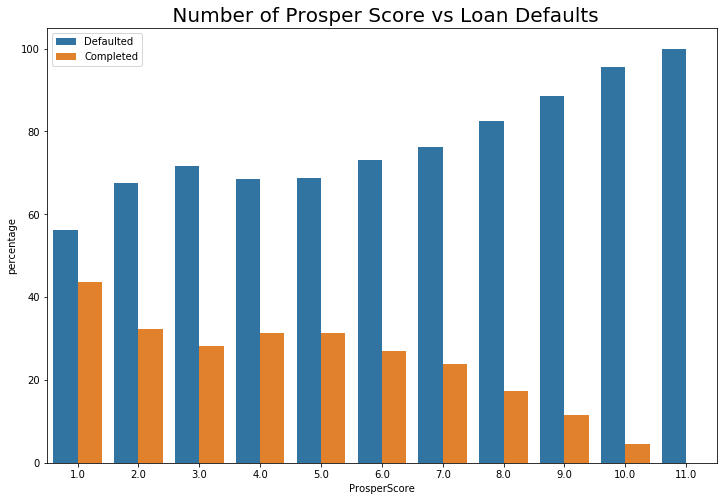

In [205]:
value_counts_status(df_new,'ProsperScore')
lg = plt.legend()
plt.title(" Number of Prosper Score vs Loan Defaults",fontsize=20)
lg.get_texts()[0].set_text('Defaulted')
lg.get_texts()[1].set_text('Completed');

In [206]:
def kde_plot(df,col):
    df_0 = df[df.LoanStatus==0]
    df_1 = df[df.LoanStatus==1]
    plt.figure(figsize=(12, 8))
    sns.kdeplot(df_0[col], shade=True,label='0');
    sns.kdeplot(df_1[col], shade=True,label='1');

### The above plots captured the differences between Categorical Variables. Now, we will see the Differences Between Continous Variables

### Lender Yield vs  Loans Defaulted 

From the below plot we can see that completed loans tend to be multimodian espcially around mutiples of 0.05 . But loan default is bimodail around 0.25 and 0.30.

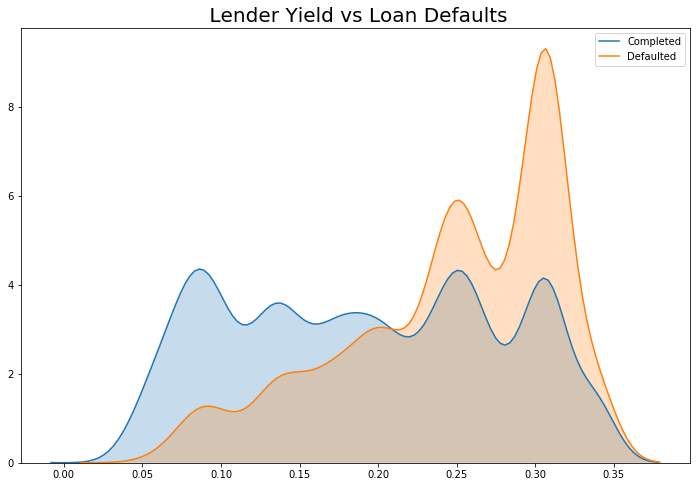

In [208]:
kde_plot(df_new,"LenderYield")
plt.title(" Lender Yield vs Loan Defaults",fontsize=20)
lg = plt.legend()
lg.get_texts()[1].set_text('Defaulted')
lg.get_texts()[0].set_text('Completed');

### Credit Score vs  Loans Defaulted 

Looks like the Defaulted distribution tend to be more left skewed when compared to the completed loans distribution.

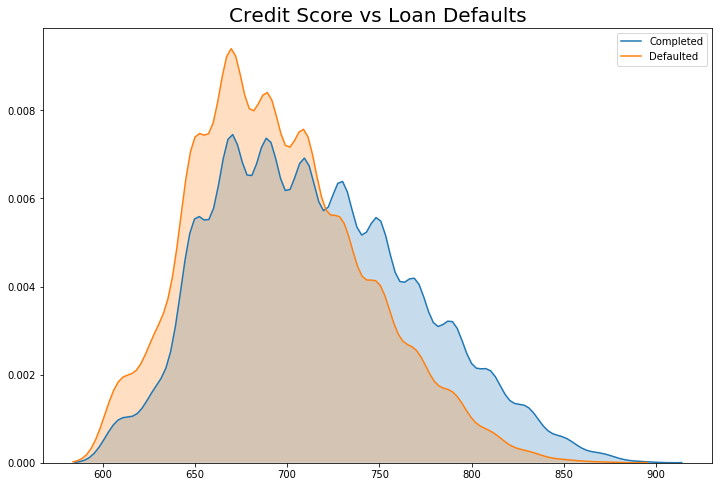

In [209]:
kde_plot(df_new,"CreditScore")
plt.title("Credit Score vs Loan Defaults",fontsize=20)
lg = plt.legend()
lg.get_texts()[1].set_text('Defaulted')
lg.get_texts()[0].set_text('Completed');

In [170]:
def remove_outlier_plot(df,col):
    filtering_rule_1  = (df[col].median() - df[col]).abs( ) > 0.3 
    lower_bound = .25
    upper_bound = .75
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    kde_plot(df,col)

### Monthly Income vs  Loans Defaulted 

Firstly to make a meaningful graph. We removed all the outliers present. 
Yet again, defaulted distributon is left to the completed distributon.

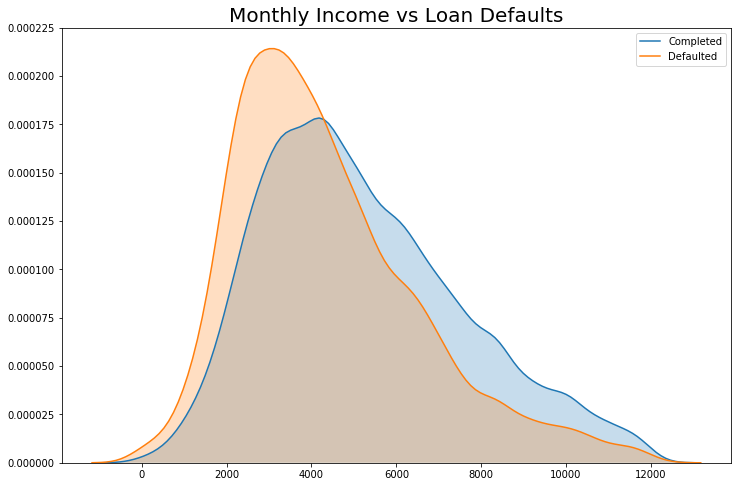

In [213]:
remove_outlier_plot(df_new,"StatedMonthlyIncome")
lg = plt.legend()
plt.title("Monthly Income vs Loan Defaults",fontsize=20)
lg.get_texts()[1].set_text('Defaulted')
lg.get_texts()[0].set_text('Completed');

### Available Bankcard Credit vs  Loans Defaulted 

Here as well, we removed all the outliers.
Both of the distribution is nearly equal. But we can conclude that if Someone's credit is Zero he is more likely to be a defaulter.

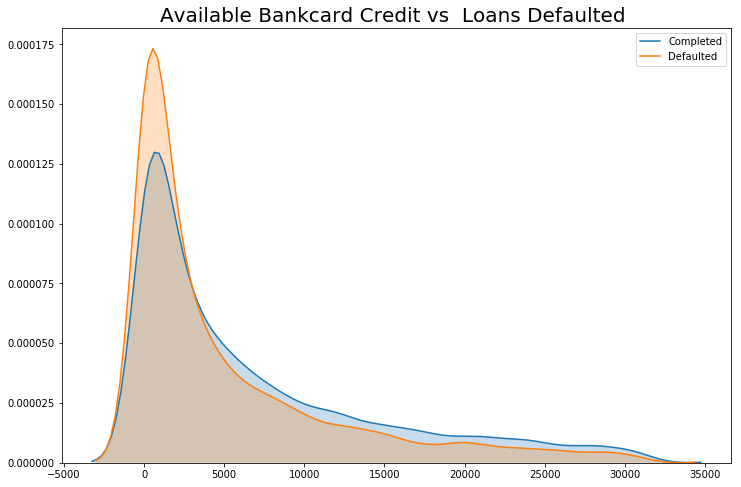

In [215]:
remove_outlier(df_new,"AvailableBankcardCredit")
lg = plt.legend()
plt.title("Available Bankcard Credit vs  Loans Defaulted ",fontsize=20)
lg.get_texts()[1].set_text('Defaulted')
lg.get_texts()[0].set_text('Completed');

### Term vs Loan Original Amount

More the term more is the amount. However, 60 months have least of the outlier loan request.

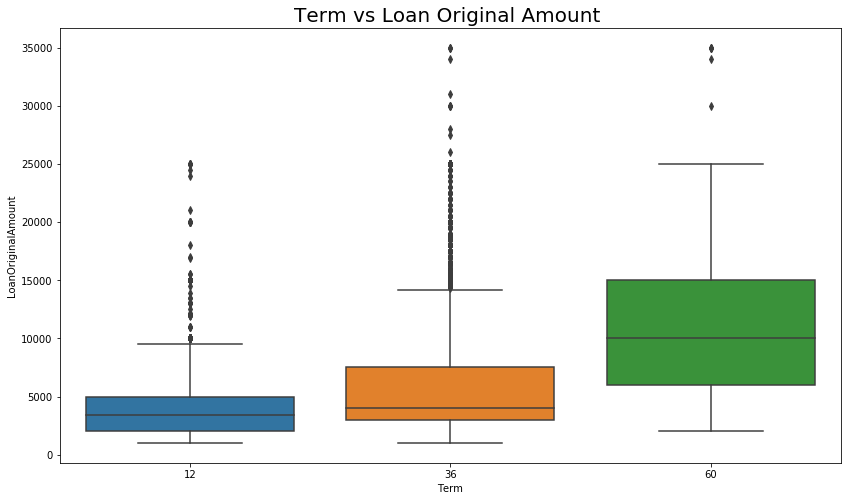

In [219]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_new,y='LoanOriginalAmount',x='Term')
plt.title("Term vs Loan Original Amount",fontsize=20);

### Term vs BorrowerRate

This plot shows a fascinating result. Loans are most pricey for 36 Terms rather than 60 Terms. 

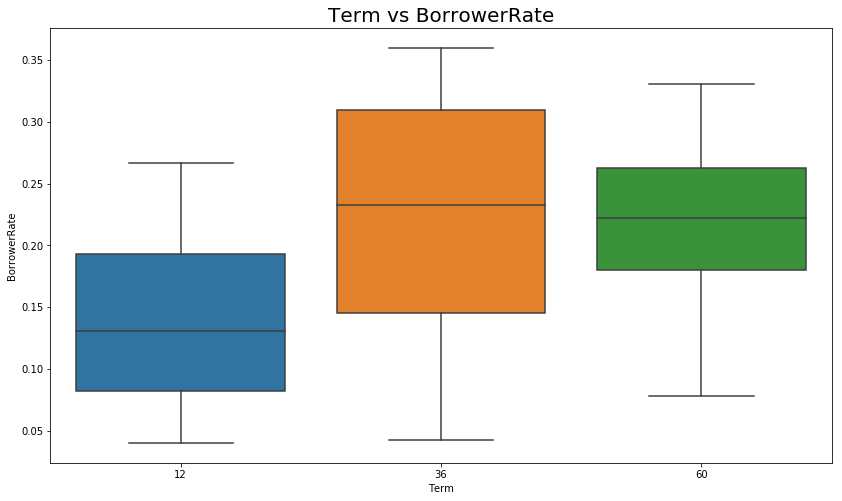

In [221]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=df_new,y='BorrowerRate',x='Term');
plt.title("Term vs Borrower Rate",fontsize=20);

### Loan Original Amount vs Prosper Rating

Different Distribution of Loan Amount for differnet Prosper Rating.

Looks like With the increase in prosper rating loans of higher values can be availed

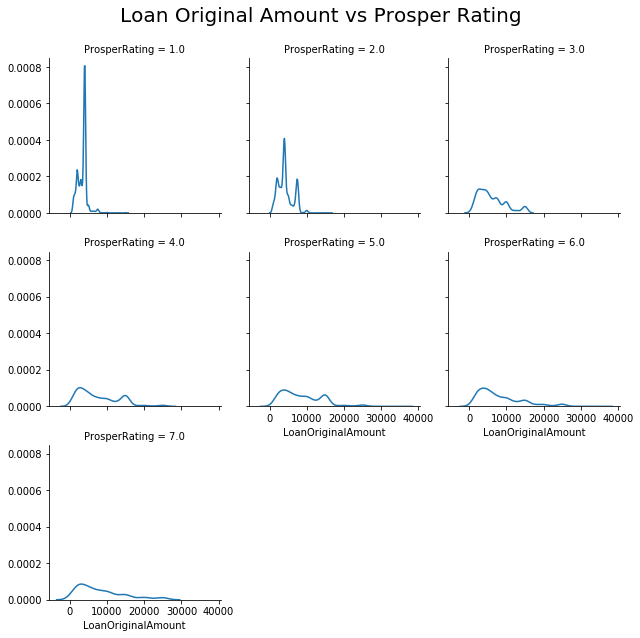

In [238]:
g = sns.FacetGrid(data = df_new, col = 'ProsperRating', col_wrap=3,margin_titles=True)
g.map(sns.kdeplot, "LoanOriginalAmount")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Loan Original Amount vs Prosper Rating",fontsize=20);

### Different Distribution for Prosper Rating  and Loan Original Amount

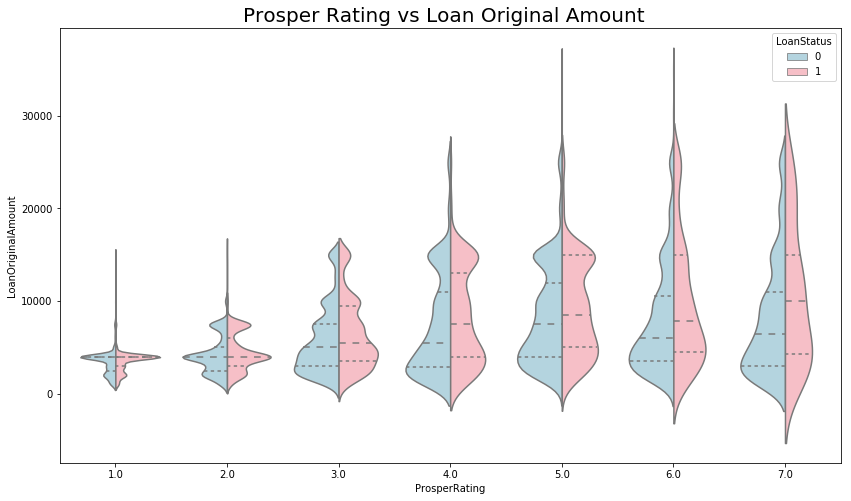

In [241]:
plt.figure(figsize=(14, 8))
plt.title("Prosper Rating vs Loan Original Amount  ",fontsize=20);
sns.violinplot(x= "ProsperRating", y = "LoanOriginalAmount", hue="LoanStatus", data=df_new,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);


### Different Distribution for Prosper Rating and Borrower Rate 
The most the rating the less rate you pay

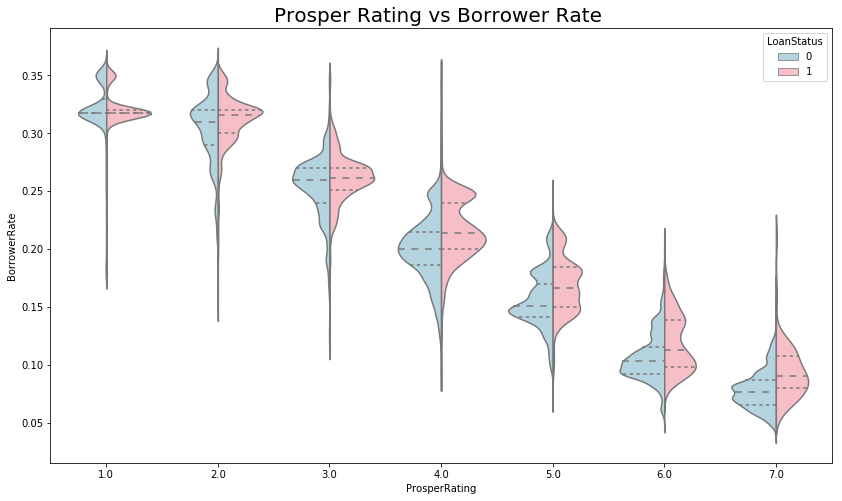

In [242]:
plt.figure(figsize=(14, 8))
plt.title("Prosper Rating vs Borrower Rate ",fontsize=20);
sns.violinplot(x= "ProsperRating", y = "BorrowerRate", hue="LoanStatus", data=df_new,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

## Correlation of Loan Status with other variables



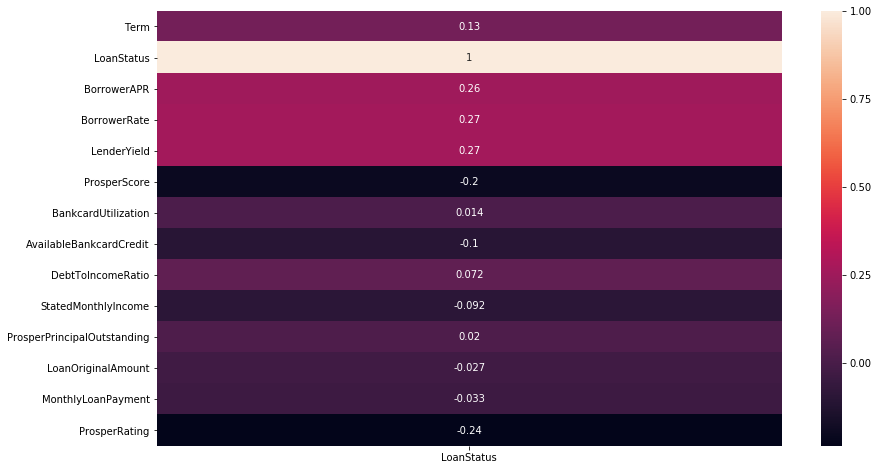

In [245]:
plt.figure(figsize=(14, 8))
df_corr = df_new.copy()
df_corr = df_corr[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'ProsperScore', 'Occupation', 'EmploymentStatus', 'BankcardUtilization',
       'AvailableBankcardCredit', 'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'TotalProsperLoans',
       'ProsperPrincipalOutstanding', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'ProsperRating']]
corr = df_corr.corr()
sns.heatmap(corr['LoanStatus'].to_frame(),annot=True);